In [1]:
import numpy as np
import os

data_path = '/home/yigit/Documents/projects/irl_sfm/data/demonstrations/sfm/1_obs_huge/'
out_path = '/home/yigit/phd/yigit_phd_thesis/cnmp/data/sfm/1_obs_huge/'

try:
    os.mkdir(f'{out_path}demonstrations')
except:
  pass
try:
    os.mkdir(f'{out_path}novel')
except:
  pass

demonstrations = []
novel_demonstrations = []

for filename in os.listdir(data_path):
    if filename.endswith(".npy"):
        path = os.path.join(data_path, filename)
        demonstrations.append(np.load(path, allow_pickle=True, encoding='latin1'))
#         print(f'{len(demonstrations)-1}: {path}')

novel_data_path = os.path.join(data_path, 'novel/')
for filename in os.listdir(novel_data_path):
    if filename.endswith(".npy"):
        path = os.path.join(novel_data_path, filename)
        novel_demonstrations.append(np.load(path, allow_pickle=True, encoding='latin1'))

num_demos = len(demonstrations)
num_novel = 1

In [6]:
desired_len = 400 # min_len
x_dim, gamma_dim, y_dim = 2, 2, 2

ldx, ldy, ldg = [], [], []

n_X = np.zeros((num_novel, desired_len, x_dim))
n_Gamma =  np.zeros((num_novel, desired_len, gamma_dim))
n_Y = np.zeros((num_novel, desired_len, y_dim))

for i, demo in enumerate(demonstrations):
    max_v_y = np.max(demo[:, -y_dim:])
    min_v_y = np.min(demo[:, -y_dim:])
    if max_v_y > 2.5 or min_v_y < -1.8:
        continue
    len_demo = len(demo)
#     print(len_demo)
    indices = np.linspace(0, len_demo-1, desired_len, dtype=int)  # <desired_len>-many indices are selected uniformly
    x, gmm, y = np.zeros((desired_len, x_dim)), np.zeros((desired_len, gamma_dim)), np.zeros((desired_len, y_dim))
    for new_ind, old_ind in enumerate(indices):
        x[new_ind] = demo[old_ind][:x_dim]
        gmm[new_ind] = demo[old_ind][x_dim:x_dim+gamma_dim]
        y[new_ind] = demo[old_ind][-y_dim:]
    
    ldx.append(x)
    ldy.append(y)
    ldg.append(gmm)
    
num_demos = len(ldx)

d_X = np.zeros((num_demos, desired_len, x_dim))
d_Gamma =  np.zeros((num_demos, desired_len, gamma_dim))
d_Y = np.zeros((num_demos, desired_len, y_dim))

for i in range(num_demos):
    d_X[i] = ldx[i]
    d_Gamma[i] = ldg[i]
    d_Y[i] = ldy[i]

#############    
# novel case
#############

for i, demo in enumerate(novel_demonstrations):
    len_demo = len(demo)
    indices = np.linspace(0, len_demo-1, desired_len, dtype=int)  # <desired_len>-many indices are selected uniformly
    x, gmm, y = np.zeros((desired_len, x_dim)), np.zeros((desired_len, gamma_dim)), np.zeros((desired_len, y_dim))
    for new_ind, old_ind in enumerate(indices):
        x[new_ind] = demo[old_ind][:x_dim]
        gmm[new_ind] = demo[old_ind][x_dim:x_dim+gamma_dim]
        y[new_ind] = demo[old_ind][-y_dim:]
    n_X[i] = x
    n_Gamma[i] = gmm
    n_Y[i] = y

[Text(0, 0.5, 'speed'), Text(0.5, 0, 'step')]

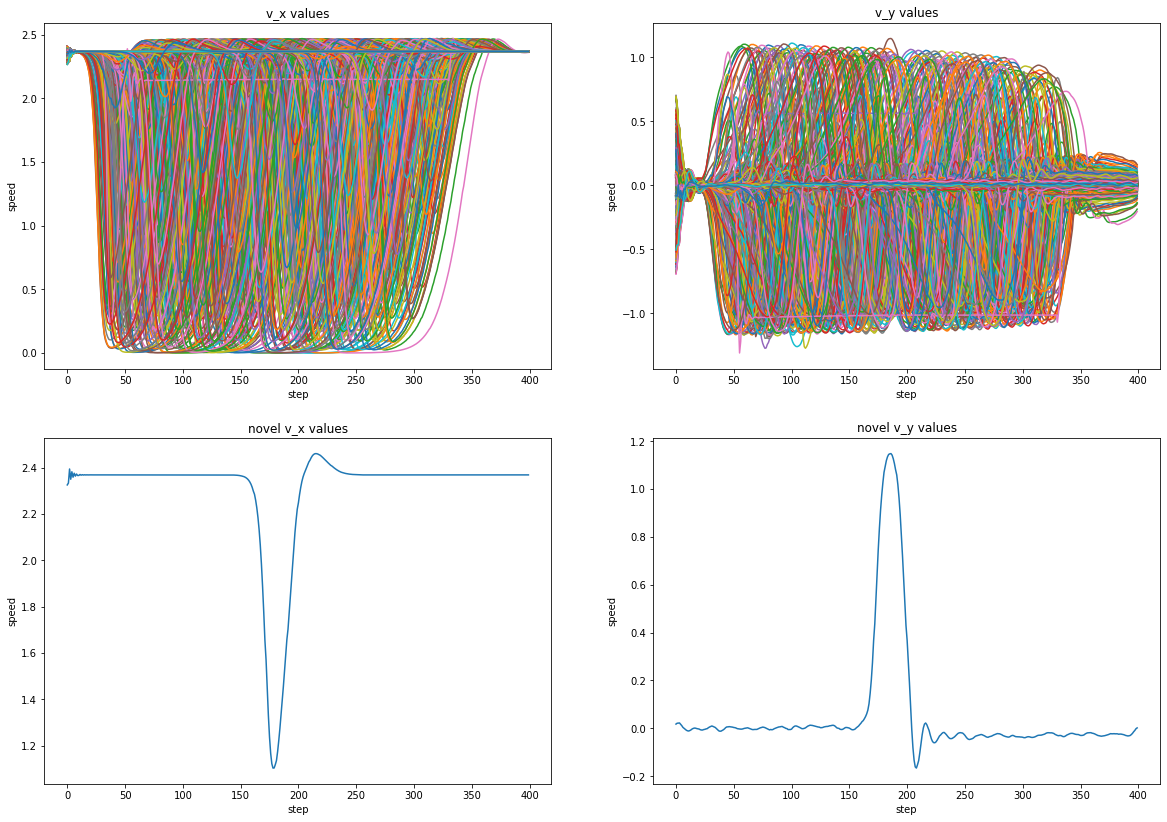

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 14]

fig, axs = plt.subplots(2, 2)
for i in range(num_demos):
    axs[0, 0].plot(range(len(d_Y[i])), d_Y[i][:, 0])  # v_x
axs[0, 0].set_title('v_x values')
axs[0, 0].set(xlabel='step', ylabel='speed')

for i in range(num_demos):
    axs[0, 1].plot(range(len(d_Y[i])), d_Y[i][:, 1])  # v_y
axs[0, 1].set_title('v_y values')
axs[0, 1].set(xlabel='step', ylabel='speed')

axs[1, 0].plot(range(len(n_Y[0])), n_Y[0][:, 0])  # v_x
axs[1, 0].set_title('novel v_x values')
axs[1, 0].set(xlabel='step', ylabel='speed')

axs[1, 1].plot(range(len(n_Y[0])), n_Y[0][:, 1])  # v_y
axs[1, 1].set_title('novel v_y values')
axs[1, 1].set(xlabel='step', ylabel='speed')

In [8]:
print(len(d_Y))

2361


In [9]:
num_val = 61

x_train, x_val, y_train, y_val, gamma_train, gamma_val = [], [], [], [], [], []
val_indices = np.sort(np.random.choice(range(num_demos-1), num_val, replace=False))

for i in range(num_demos):
    if i in val_indices:  # validation instance
        print(f'val: {i}')
        x_val.append(d_X[i])
        gamma_val.append(d_Gamma[i])
        y_val.append(d_Y[i])
    else:  # training instance
        print(f'train: {i}')
        x_train.append(d_X[i])
        gamma_train.append(d_Gamma[i])
        y_train.append(d_Y[i])
        
np.save(out_path + 'demonstrations/' + 'd_x.npy', np.array(x_train))
np.save(out_path + 'demonstrations/' + 'd_y.npy', np.array(y_train))
np.save(out_path + 'demonstrations/' + 'd_gamma.npy', np.array(gamma_train))
np.save(out_path + 'demonstrations/' + 'v_d_x.npy', np.array(x_val))
np.save(out_path + 'demonstrations/' + 'v_d_y.npy', np.array(y_val))
np.save(out_path + 'demonstrations/' + 'v_d_gamma.npy', np.array(gamma_val))

#############
# novel case
#############

np.save(out_path + 'novel/' + 'd_x.npy', np.array(n_X))
np.save(out_path + 'novel/' + 'd_y.npy', np.array(n_Y))
np.save(out_path + 'novel/' + 'd_gamma.npy', np.array(n_Gamma))

train: 0
train: 1
train: 2
train: 3
train: 4
train: 5
train: 6
train: 7
train: 8
train: 9
train: 10
train: 11
val: 12
train: 13
train: 14
train: 15
train: 16
train: 17
train: 18
train: 19
train: 20
train: 21
train: 22
train: 23
train: 24
train: 25
train: 26
train: 27
train: 28
train: 29
train: 30
train: 31
train: 32
train: 33
train: 34
train: 35
train: 36
train: 37
train: 38
train: 39
train: 40
train: 41
train: 42
train: 43
train: 44
train: 45
train: 46
train: 47
train: 48
train: 49
train: 50
train: 51
train: 52
train: 53
train: 54
train: 55
train: 56
train: 57
train: 58
train: 59
train: 60
train: 61
train: 62
train: 63
train: 64
train: 65
train: 66
train: 67
train: 68
train: 69
train: 70
train: 71
train: 72
train: 73
train: 74
train: 75
train: 76
train: 77
train: 78
train: 79
train: 80
train: 81
train: 82
train: 83
train: 84
train: 85
train: 86
train: 87
train: 88
train: 89
train: 90
train: 91
train: 92
train: 93
train: 94
train: 95
train: 96
train: 97
train: 98
train: 99
train: 100
t

train: 2242
train: 2243
train: 2244
train: 2245
train: 2246
train: 2247
train: 2248
train: 2249
train: 2250
train: 2251
train: 2252
train: 2253
train: 2254
train: 2255
train: 2256
train: 2257
train: 2258
train: 2259
train: 2260
train: 2261
train: 2262
train: 2263
train: 2264
train: 2265
train: 2266
train: 2267
train: 2268
train: 2269
train: 2270
train: 2271
train: 2272
train: 2273
val: 2274
train: 2275
train: 2276
train: 2277
train: 2278
train: 2279
train: 2280
train: 2281
train: 2282
train: 2283
train: 2284
train: 2285
train: 2286
train: 2287
train: 2288
train: 2289
train: 2290
train: 2291
train: 2292
train: 2293
train: 2294
train: 2295
train: 2296
train: 2297
train: 2298
train: 2299
train: 2300
train: 2301
train: 2302
train: 2303
train: 2304
train: 2305
train: 2306
train: 2307
train: 2308
val: 2309
train: 2310
train: 2311
train: 2312
train: 2313
train: 2314
train: 2315
train: 2316
train: 2317
train: 2318
train: 2319
train: 2320
train: 2321
train: 2322
train: 2323
train: 2324
train: 2